In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [5]:
data = datasets.fetch_openml(
'mnist_784',
version=1,
return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

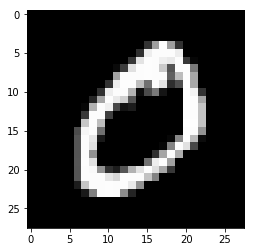

In [6]:
single_image = pixel_values[1, :].reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [9]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [10]:
transformed_data

array([[ -9.742266 , -28.548525 ],
       [-25.476608 , -66.11101  ],
       [-39.992714 ,  32.70732  ],
       ...,
       [ 11.244629 ,  46.15065  ],
       [ 10.057817 ,   5.1960177],
       [ -6.3570476,  -7.602555 ]], dtype=float32)

In [12]:
tsne_df = pd.DataFrame(
np.column_stack((transformed_data, targets[:3000])),
columns=["x", "y", "targets"]
)
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)
tsne_df[0:5]

,x,y,targets
0,-9.742266,-28.548525,5
1,-25.476608,-66.111008,0
2,-39.992714,32.707321,4
3,46.730042,29.864080,1
4,-14.279590,30.505270,9


/home/harsh/anaconda3/envs/ml/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


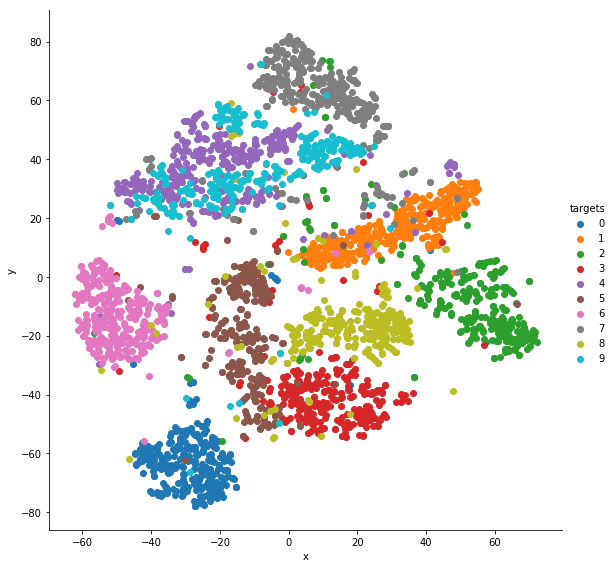

In [13]:
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter, "x", "y").add_legend()